In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [3]:
consumer_key= 'n6i9rgcROhCNhzTxhNlsa9ae7'
consumer_secret= 'BuNFJjZNk7MMrS1yXksc5kWAqcZUKUxsjx5H4vIPzAWHXNlyxc'
access_token= '2482495043-ysWQsfSLEoDcRIEZrNVk9YVQ5K9lEG416nDelLC'
access_token_secret= 'g7RdKaGJEy8L1HihwWDmgcanT7mngC5gS6wVdPFYB5ebF'


In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [5]:
import findspark
import pyspark


In [6]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [7]:
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .config("spark.sql.broadcastTimeout", "36000")\
    .getOrCreate()

In [8]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.4.1 pyspark-shell'

In [9]:
df_load = spark.read.csv('hdfs://192.168.122.206:8020/data/vol/depart/*.csv',header='true')

In [10]:
df_load.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- aircraft_aircrafttype_iatacode: string (nullable = true)
 |-- aircraft_aircrafttype_icaocode: string (nullable = true)
 |-- aircraft_aircrafttype_modelname: string (nullable = true)
 |-- airlines_airline_iatacode: string (nullable = true)
 |-- airlines_airline_icaocode: string (nullable = true)
 |-- airlines_airline_name: string (nullable = true)
 |-- airlines_operator_iatacode: string (nullable = true)
 |-- airlines_operator_icaocode: string (nullable = true)
 |-- airlines_operator_name: string (nullable = true)
 |-- airportresources_boarding_departurelounge: string (nullable = true)
 |-- airportresources_boarding_gates: string (nullable = true)
 |-- airportresources_checkin_checkinarea: string (nullable = true)
 |-- airportresources_checkin_desks: string (nullable = true)
 |-- airportresources_terminal: string (nullable = true)
 |-- airports_destination_iatacode: string (nullable = true)
 |-- airports_destination_icaocode: string (nullable

In [11]:
list1=df_load.select('airlines_airline_name').distinct().collect()

In [21]:
lista=[]
for i in range(0,len(list1)):
    lista.append(list1[i].airlines_airline_name)

In [22]:
lista

['TUI Airlines Belgium',
 'Lufthansa CityLine',
 'Klasjet',
 'GET JET Airlines',
 'ASL Airlines France',
 'Klm',
 'Turkish',
 'Sas Scandinavian Airlines System',
 'Emirates Airlines',
 'Air France',
 'AIRHORIZONT',
 'FLY GR8',
 'Blue air',
 'PVT airline FARMS',
 'Easy Jet Europe',
 'Onur Air Tasimacilik',
 'Jet2.Com',
 'BLX',
 'Eurowings',
 'British Airways',
 'Tarom',
 'RBG',
 'Air Algerie',
 'Royal Air Maroc',
 'Tunis Air',
 'Easyjet ',
 'A supprimer',
 'Lufthansa',
 'Iberia Express',
 'Iberia Airlines',
 'Tap Air Portugal',
 'Pegasus Airlines',
 'RLU',
 'Air Canada',
 'A SUPPRIMER',
 'Free bird europe',
 'Easyjet Switzerland S.A.',
 'Austrian Airlines',
 'Transavia Holland',
 'FLY EGYPT',
 'Air Cairo Ltd',
 'Aeroflot',
 'Braathens Regional Aviation AB',
 'Pichard Executve',
 'Ryanair',
 'Norwegian',
 'Monarch Airlines',
 'Free Bird Airlines',
 'Almasria universal airlines',
 'Chalair Aviation',
 'Volotea',
 'Alba Star',
 'Titan Airways',
 'Blue Air',
 'Wizz Air',
 'Air Nostrum',
 'T

In [12]:
mydict1={}
i=0
for airC in list1:
    print(i,airC.airlines_airline_name)
    i+=1
    if(airC.airlines_airline_name!="Klm" and airC.airlines_airline_name!="Turkish" and airC.airlines_airline_name!="Enter Air" and airC.airlines_airline_name!="NILE AIR" and airC.airlines_airline_name!="Finnair"):
        if(len(airC.airlines_airline_name.split(' '))>=2):
            search_term = airC.airlines_airline_name.replace(" ", "+")
        else:
            search_term = airC.airlines_airline_name

        tweets = tw.Cursor(api.search,
                           q=search_term,
                            lang="fr",count=1000).items(1000)
        all_tweets = [tweet.text for tweet in tweets]

        mydict1[airC.airlines_airline_name]=all_tweets
        
    if(airC.airlines_airline_name=="Turkish"):
        search_term = "turkish airlines"

        tweets = tw.Cursor(api.search,
                           q=search_term,
                            lang="fr",count=1000).items(1000)
        all_tweets = [tweet.text for tweet in tweets]

        mydict1[airC.airlines_airline_name]=all_tweets
    


0 TUI Airlines Belgium
1 Lufthansa CityLine
2 Klasjet
3 GET JET Airlines
4 ASL Airlines France
5 Klm
6 Turkish
7 Sas Scandinavian Airlines System
8 Emirates Airlines
9 Air France
10 AIRHORIZONT
11 FLY GR8
12 Blue air
13 PVT airline FARMS
14 Easy Jet Europe
15 Jet2.Com
16 BLX
17 Eurowings
18 British Airways
19 Tarom
20 RBG
21 Air Algerie
22 Royal Air Maroc
23 Tunis Air
24 Easyjet 
25 A supprimer
26 Lufthansa
27 Iberia Express
28 Iberia Airlines
29 Tap Air Portugal
30 Pegasus Airlines
31 RLU
32 Air Canada
33 A SUPPRIMER
34 Free bird europe
35 Easyjet Switzerland S.A.
36 Austrian Airlines
37 Transavia Holland
38 FLY EGYPT
39 Air Cairo Ltd
40 Aeroflot
41 Braathens Regional Aviation AB
42 Pichard Executve
43 Ryanair
44 Norwegian
45 Monarch Airlines
46 Free Bird Airlines
47 Almasria universal airlines
48 Chalair Aviation
49 Volotea
50 Alba Star
51 Titan Airways
52 Blue Air
53 Wizz Air
54 Air Nostrum
55 Thomsonfly.Com
56 Air Malta
57 NILE AIR
58 Travel Service Airlines
59 Vueling Airlines S.A

In [28]:
mydict={}
i=0
for airC in list1:
    print(i,airC.airlines_airline_name)
    i+=1
    if(airC.airlines_airline_name!="Klm" and airC.airlines_airline_name!="Turkish" and airC.airlines_airline_name!="NILE AIR"  and airC.airlines_airline_name!="Finnair"):
        if(len(airC.airlines_airline_name.split(' '))>=2):
            search_term = airC.airlines_airline_name.replace(" ", "+")
        else:
            search_term = airC.airlines_airline_name

        tweets = tw.Cursor(api.search,
                           q=search_term,
                            lang="en",count=100).items(100)
        all_tweets = [tweet.text for tweet in tweets]

        mydict[airC.airlines_airline_name]=all_tweets
        
    if(airC.airlines_airline_name=="Turkish"):
        search_term = "turkish airlines"

        tweets = tw.Cursor(api.search,
                           q=search_term,
                            lang="en",count=100).items(100)
        all_tweets = [tweet.text for tweet in tweets]

        mydict[airC.airlines_airline_name]=all_tweets
    

0 TUI Airlines Belgium
1 Lufthansa CityLine
2 Klasjet
3 GET JET Airlines
4 ASL Airlines France
5 Klm
6 Turkish
7 Sas Scandinavian Airlines System
8 Emirates Airlines
9 Air France
10 AIRHORIZONT
11 FLY GR8
12 Blue air
13 PVT airline FARMS
14 Easy Jet Europe
15 Jet2.Com
16 BLX
17 Eurowings
18 British Airways
19 Tarom
20 RBG
21 Air Algerie
22 Royal Air Maroc
23 Tunis Air
24 Easyjet 
25 A supprimer
26 Lufthansa
27 Iberia Express
28 Iberia Airlines
29 Tap Air Portugal
30 Pegasus Airlines
31 RLU
32 Air Canada
33 A SUPPRIMER
34 Free bird europe
35 Easyjet Switzerland S.A.
36 Austrian Airlines
37 Transavia Holland
38 FLY EGYPT
39 Air Cairo Ltd
40 Aeroflot
41 Braathens Regional Aviation AB
42 Pichard Executve
43 Ryanair
44 Norwegian
45 Monarch Airlines
46 Free Bird Airlines
47 Almasria universal airlines
48 Chalair Aviation
49 Volotea
50 Alba Star
51 Titan Airways
52 Blue Air
53 Wizz Air
54 Air Nostrum
55 Thomsonfly.Com
56 Air Malta
57 NILE AIR
58 Travel Service Airlines
59 Vueling Airlines S.A

In [27]:
mydict['Twinjet']

NameError: name 'mydict' is not defined

In [47]:
import pandas as pd
df=pd.DataFrame.from_dict(mydict,orient='index').transpose()

In [24]:
df.to_csv (r'tweetsEn.csv', index = False, header=True)

In [13]:
import pandas as pd
df1=pd.DataFrame.from_dict(mydict1,orient='index').transpose()

In [14]:
df1

TUI Airlines Belgium                                 Lufthansa CityLine  \
0                   None  RT @flyCSI: Lufthansa Group est le 1er groupe ...   
1                   None  Lufthansa Group est le 1er groupe européen à d...   
2                   None                                               None   
3                   None                                               None   
4                   None                                               None   
..                   ...                                                ...   
995                 None                                               None   
996                 None                                               None   
997                 None                                               None   
998                 None                                               None   
999                 None                                               None   

    Klasjet GET JET Airlines ASL Airlines France  \
0      None             None                None   
1      None             None                None   
2      None             None                None   
3      None             None                None   
4      None             None                None   
..      ...              ...                 ...   
995    None             None                None   
996    None             None                None   
997    None             None                None   
998    None             None                None   
999    None             None                None   

                                               Turkish  \
0    Mdr Turkish airlines ne desserviras pas avant ...   
1    RT @Shazamik: Pires que les blancs eux. Ils fo...   
2    Pires que les blancs eux. Ils font des genocid...   
3    On m’a appelée turkish airlines je demande pq ...   
4    RT @jsstonheros: - Turkish Airlines\n- Virgin ...   
..                                                 ...   
995                                               None   
996                                               None   
997                                               None   
998                                               None   
999                                               None   

    Sas Scandinavian Airlines System  \
0                               None   
1                               None   
2                               None   
3                               None   
4                               None   
..                               ...   
995                             None   
996                             None   
997                             None   
998                             None   
999                             None   

                                     Emirates Airlines  \
0    Emirates Airlines: 7 routes dont Alger et Tuni...   
1    RT @airjournal: Emirates Airlines: 7 routes do...   
2    Emirates Airlines: 7 routes dont Alger et Tuni...   
3    Group G 2/4\nEmirates Expo 2020 Orange\n https...   
4    RT @lemondefr: 🔵 LIVE #COVIDー19 | Les compagni...   
..                                                 ...   
995                                               None   
996                                               None   
997                                               None   
998                                               None   
999                                               None   

                                            Air France AIRHORIZONT  ...  \
0    RT @AudreyAndCoLCI: E. #Macron vous a-t-il con...        None  ...   
1    RT @AudreyAndCoLCI: E. #Macron vous a-t-il con...        None  ...   
2    RT @alexandre_gamet: |THREAD #1| L’histoire du...        None  ...   
3    E. #Macron vous a-t-il convaincu ?\n\n🗣@AQuate...        None  ...   
4    RT @alexandre_gamet: |THREAD #1| L’histoire du...        None  ...   
..                                                 ...         ...  ...   
995  Les tirs seraient survenu

In [19]:
listA=[]
lettre=""
for key in mydict1:
    for l in mydict1[key]:
        lettre=lettre+" "+l
        listA.append((key,l))

In [20]:
lettre

' RT @flyCSI: Lufthansa Group est le 1er groupe européen à dévoiler des mesures significatives :\n➡️ Sorties de flotte : -6 A380 -7 A340 -5 74… Lufthansa Group est le 1er groupe européen à dévoiler des mesures significatives :\n➡️ Sorties de flotte : -6 A380 -… https://t.co/aW5ZRyipqM Mdr Turkish airlines ne desserviras pas avant le 20 mai. Bon il me reste plus qu’à trouver un job et une école ici RT @Shazamik: Pires que les blancs eux. Ils font des genocides qu’ils nient mais veulent nous faire croire que c’est les bons qui aident l’… Pires que les blancs eux. Ils font des genocides qu’ils nient mais veulent nous faire croire que c’est les bons qui… https://t.co/iWSzpDdyzH On m’a appelée turkish airlines je demande pq on me dit parce que t’es un avion de chasse,  xptdddddrrr RT @jsstonheros: - Turkish Airlines\n- Virgin Atlantic\n- EasyJet (low-cost)\n- Ryanair (je conseille oui même si j’éviterais)\n- KLM\n- Etihad… - Turkish Airlines\n- Virgin Atlantic\n- EasyJet (low-cost)\n- Ryana

In [29]:
listAn=[]
lettre2=""
for key in mydict:
    for l in mydict[key]:
        lettre2=lettre2+" "+l
        listAn.append((key,l))

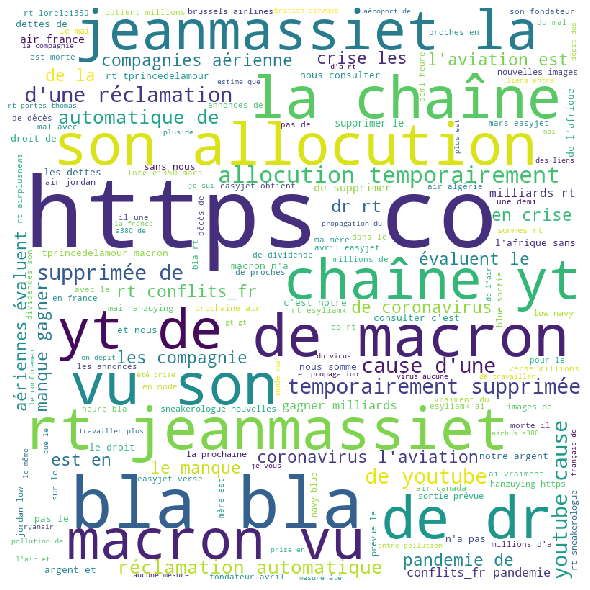

In [25]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 


comment_words = ' '
stopwords = set(STOPWORDS) 


    # split the value 
tokens = lettre.split() 
    
    # Converts each token into lowercase 
for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
for words in tokens: 
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
background_color ='white', 
min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


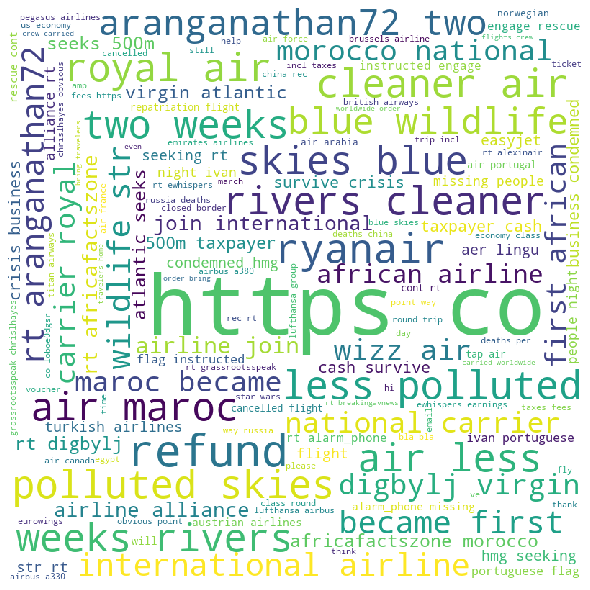

In [30]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 


comment_words = ' '
stopwords = set(STOPWORDS) 


    # split the value 
tokens = lettre2.split() 
    
    # Converts each token into lowercase 
for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
for words in tokens: 
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
background_color ='white', 
min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [35]:
delaycount=0
count=0
for key in mydict:
    for l in mydict[key]:
        count+=1
        tokens=l.split()
        for word in tokens:
            if word.lower()=='delay':
                delaycount+=1

In [36]:
delaycount

31

In [38]:
count

3472

In [39]:
delaycount=0
count=0
for key in mydict1:
    for l in mydict1[key]:
        count+=1
        tokens=l.split()
        for word in tokens:
            if word.lower()=='retard':
                delaycount+=1

In [40]:
delaycount

2

In [41]:
count

9508

In [43]:
   mydict

{'TUI Airlines Belgium': ['RT @AirportWebcams: TUI Airlines Belgium #TB8054 (operated by TUI Netherlands Boeing 767-300ER PH-OYI) just landed at Halifax from Amsterda…',
  'RT @AirportWebcams: TUI Airlines Belgium #TB8054 (operated by TUI Netherlands Boeing 767-300ER PH-OYI) just landed at Halifax from Amsterda…',
  'TUI Airlines Belgium #TB8054 (operated by TUI Netherlands Boeing 767-300ER PH-OYI) just landed at Halifax from Amst… https://t.co/AEncmLgMq9'],
 'Lufthansa CityLine': ['Lufthansa Regional - CityLine Canadair CL-600 CRJ-900, Photo ID: 1296515 https://t.co/RPGqErhecW https://t.co/7PjSVVZ5fV',
  'Lufthansa will retire 32 aircraft based on the demand reduction, Lufthansa will be retiring the following aircraft:… https://t.co/hKXiiZZVlb',
  'RT @AirportWebcams: NEWS: Lufthansa Group reveals extensive fleet cuts:\n* Lufthansa: 6 Airbus A380; 7 A340-600; 11 A320; 5 Boeing 747-400\n*…',
  "@AndythePandy_ yeah Lufthansa have Cityline don't they?",
  "RT @PilotJayNZ: We bid Farewell

In [48]:
df["Lufthansa CityLine"]

0     Lufthansa Regional - CityLine Canadair CL-600 ...
1     Lufthansa will retire 32 aircraft based on the...
2     RT @AirportWebcams: NEWS: Lufthansa Group reve...
3     @AndythePandy_ yeah Lufthansa have Cityline do...
4     RT @PilotJayNZ: We bid Farewell to #GermanWing...
                            ...                        
95                                                 None
96                                                 None
97                                                 None
98                                                 None
99                                                 None
Name: Lufthansa CityLine, Length: 100, dtype: object

In [49]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [60]:
data = df.values.tolist()

In [62]:
datalist=data[0]
for i in range(1,len(data)):
    datalist.append(data[i])

In [64]:
data=datalist
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

TypeError: expected string or bytes-like object

In [65]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['rt', 'airportwebcams', 'tui', 'airlines', 'belgium', 'tb', 'operated', 'by', 'tui', 'netherlands', 'boeing', 'er', 'ph', 'oyi', 'just', 'landed', 'at', 'halifax', 'from', 'amsterda']]


In [69]:
print(data_words)

[['rt', 'airportwebcams', 'tui', 'airlines', 'belgium', 'tb', 'operated', 'by', 'tui', 'netherlands', 'boeing', 'er', 'ph', 'oyi', 'just', 'landed', 'at', 'halifax', 'from', 'amsterda'], ['lufthansa', 'regional', 'cityline', 'canadair', 'cl', 'crj', 'photo', 'id', 'https', 'co', 'rpgqerhecw', 'https', 'co', 'pjsvvz', 'fv'], ['chapmanfreeborn', 'schedules', 'weekly', 'flights', 'to', 'mumbai', 'india', 'chapmanfreeborn', 'fs', 'https', 'co', 'tb', 'qjtmq'], ['our', 'family', 'was', 'rich', 'from', 'to', 'because', 'my', 'father', 'won', 'really', 'big', 'lawsuit', 'against', 'pan', 'american', 'airlines', 'https', 'co', 'xbbfzx'], ['rt', 'alexinair', 'latest', 'turkish', 'airlines', 'the', 'airline', 'flying', 'to', 'more', 'countries', 'than', 'any', 'other', 'airline', 'in', 'the', 'world', 'has', 'extended', 'the', 'cance'], ['rt', 'austerityairli', 'se', 'daz', 'convair', 'coronado', 'belonging', 'to', 'scandinavian', 'airlines', 'system', 'sas', 'landing', 'at', 'heathrow', 'in', '

In [68]:
data_words.remove(['none'])

In [70]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['rt', 'airportwebcams', 'tui', 'airlines', 'belgium', 'tb', 'operated_by', 'tui', 'netherlands', 'boeing', 'er', 'ph', 'oyi', 'just', 'landed', 'at', 'halifax', 'from', 'amsterda']


In [71]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [97]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:1])

[['airportwebcam', 'operate', 'land']]


In [96]:
print(data_words_nostops)

[['rt', 'airportwebcams', 'tui', 'airlines', 'belgium', 'tb', 'operated', 'tui', 'netherlands', 'boeing', 'er', 'ph', 'oyi', 'landed', 'halifax', 'amsterda'], ['lufthansa', 'regional', 'cityline', 'canadair', 'cl', 'crj', 'photo', 'id', 'https', 'co', 'rpgqerhecw', 'https', 'co', 'pjsvvz', 'fv'], ['chapmanfreeborn', 'schedules', 'weekly', 'flights', 'mumbai', 'india', 'chapmanfreeborn', 'fs', 'https', 'co', 'tb', 'qjtmq'], ['family', 'rich', 'father', 'really', 'big', 'lawsuit', 'pan', 'american', 'airlines', 'https', 'co', 'xbbfzx'], ['rt', 'alexinair', 'latest', 'turkish', 'airlines', 'airline', 'flying', 'countries', 'airline', 'world', 'extended', 'cance'], ['rt', 'austerityairli', 'se', 'daz', 'convair', 'coronado', 'belonging', 'scandinavian', 'airlines', 'system', 'sas', 'landing', 'heathrow', 'se'], ['covid', 'emirates', 'offers', 'customers', 'years', 'validity', 'current', 'tickets', 'travel', 'vouchers', 'emirates', 'https', 'co', 'cu', 'jwpfc'], ['air', 'fucking', 'france',

In [98]:
id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(1604, 1), (2358, 1)]]


In [99]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [100]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"deck" + 0.008*"literal" + 0.005*"stayathome" + 0.001*"everyday" + '
  '0.000*"post" + 0.000*"none" + 0.000*"flight" + 0.000*"full" + 0.000*"co" + '
  '0.000*"see"'),
 (1,
  '0.011*"transat" + 0.005*"pulse" + 0.005*"rich" + 0.002*"lawsuit" + '
  '0.002*"reserve" + 0.002*"tjlqrad" + 0.002*"modernize" + 0.000*"really" + '
  '0.000*"big" + 0.000*"none"'),
 (2,
  '0.000*"close" + 0.000*"none" + 0.000*"co" + 0.000*"get" + 0.000*"make" + '
  '0.000*"flight" + 0.000*"https" + 0.000*"air" + 0.000*"fly" + '
  '0.000*"airline"'),
 (3,
  '0.002*"butter" + 0.000*"raffle" + 0.000*"affiliate" + 0.000*"push" + '
  '0.000*"continue" + 0.000*"type" + 0.000*"extra" + 0.000*"co" + 0.000*"none" '
  '+ 0.000*"get"'),
 (4,
  '0.000*"none" + 0.000*"co" + 0.000*"flight" + 0.000*"airline" + '
  '0.000*"refund" + 0.000*"cancel" + 0.000*"https" + 0.000*"fly" + 0.000*"air" '
  '+ 0.000*"go"'),
 (5,
  '0.005*"cote" + 0.005*"confirmation" + 0.002*"elegant" + 0.002*"iqqoimh" + '
  '0.002*"budap" + 0.00

In [101]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.009436536837347

Coherence Score:  0.31689227500397454


In [102]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.486450  0.000621       1        1  98.593506
12    -0.035520  0.047681       2        1   0.535991
14    -0.032491 -0.023755       3        1   0.363722
1     -0.026095 -0.004858       4        1   0.068714
0     -0.025631 -0.003808       5        1   0.057071
5     -0.024946 -0.002811       6        1   0.049899
8     -0.025301 -0.001700       7        1   0.043966
6     -0.025267 -0.002666       8        1   0.042233
17    -0.024873 -0.001901       9        1   0.034405
13    -0.025064 -0.002312      10        1   0.033564
7     -0.024573 -0.000729      11        1   0.025775
15    -0.024452 -0.001137      12        1   0.024632
19    -0.023652  0.000913      13        1   0.019968
9     -0.024292 -0.000836      14        1   0.018732
3     -0.024120 -0.000625      15        1   0.018254
10    -0.024010 -0.000413      16        1   0.014525
4     -0.023986 -0.000409      17        1   0.014508
16    -0.024059 -0.000418      18        1   0.013594
11    -0.024058 -0.000418      19        1   0.013481
2     -0.024060 -0.000419      20        1   0.013468, topic_info=     Category        Freq           Term       Total  loglift  logprob
73    Default  106.000000         travel  106.000000  30.0000  30.0000
553   Default  102.000000           take  102.000000  29.0000  29.0000
1812  Default  101.000000            say  101.000000  28.0000  28.0000
455   Default  107.000000         crisis  107.000000  27.0000  27.0000
4478  Default  107.000000           seek  107.000000  26.0000  26.0000
...       ...         ...            ...         ...      ...      ...
1085  Topic20    0.000294           many   27.304556  -2.5265  -9.0729
952   Topic20    0.000294         change   21.369740  -2.2814  -9.0729
1620  Topic20    0.000294          right   40.144848  -2.9119  -9.0729
2842  Topic20    0.000294  sacredpawsltd    0.720068   1.1090  -9.0729
1338  Topic20    0.000294           good   22.670713  -2.3405  -9.0729

[1671 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
301       1  0.982292        able
579       1  1.049400  additional
292       1  1.122517   affiliate
322       1  0.963652       agent
77        1  1.000596         air
...     ...       ...         ...
104       1  1.020656    wildlife
53        1  0.991474       world
244       1  0.997741   worldwide
228       1  0.993233       would
2158      1  1.012983        year

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 13, 15, 2, 1, 6, 9, 7, 18, 14, 8, 16, 20, 10, 4, 11, 5, 17, 12, 3])

In [103]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [104]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(17,
  [('flight', 0.11213517665130568),
   ('refund', 0.10599078341013825),
   ('make', 0.06605222734254992),
   ('full', 0.047619047619047616),
   ('pandemic', 0.043010752688172046),
   ('money', 0.03686635944700461),
   ('contact', 0.03533026113671275),
   ('back', 0.03533026113671275),
   ('nee', 0.030721966205837174),
   ('seek', 0.029185867895545316)]),
 (5,
  [('travel', 0.04833333333333333),
   ('end', 0.045),
   ('launch', 0.03833333333333333),
   ('breath', 0.035),
   ('tap', 0.03166666666666667),
   ('solution', 0.03166666666666667),
   ('confinement', 0.03),
   ('suspension', 0.025),
   ('part', 0.021666666666666667),
   ('number', 0.021666666666666667)]),
 (16,
  [('air', 0.21087314662273476),
   ('book', 0.07907742998352553),
   ('airline', 0.07742998352553541),
   ('crisis', 0.057660626029654036),
   ('tap', 0.05271828665568369),
   ('people', 0.051070840197693576),
   ('time', 0.042833607907743),
   ('process', 0.023064250411861616),
   ('rebook', 0.018121911037891267)

In [105]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [106]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

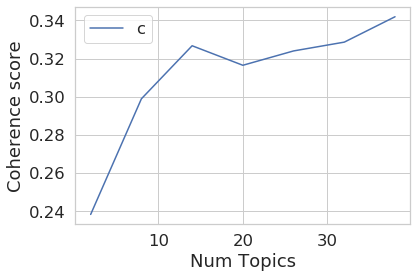

In [107]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [108]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2383
Num Topics = 8  has Coherence Value of 0.2989
Num Topics = 14  has Coherence Value of 0.3267
Num Topics = 20  has Coherence Value of 0.3165
Num Topics = 26  has Coherence Value of 0.324
Num Topics = 32  has Coherence Value of 0.3286
Num Topics = 38  has Coherence Value of 0.3419


In [109]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.064*"https" + 0.064*"airline" + 0.040*"due" + 0.030*"give" + '
  '0.026*"people" + 0.025*"service" + 0.025*"crisis" + 0.024*"government" + '
  '0.023*"start" + 0.020*"norwegian"'),
 (1,
  '0.145*"flight" + 0.110*"refund" + 0.089*"cancel" + 0.021*"cut" + '
  '0.021*"back" + 0.021*"full" + 0.020*"business" + 0.017*"receive" + '
  '0.015*"month" + 0.014*"contact"'),
 (2,
  '0.051*"night" + 0.049*"flag" + 0.047*"rescue" + 0.046*"engage" + '
  '0.040*"air" + 0.033*"seek" + 0.030*"royal" + 0.023*"dream" + 0.022*"call" + '
  '0.021*"international"'),
 (3,
  '0.112*"airline" + 0.044*"repatriation" + 0.037*"refund" + 0.037*"survive" + '
  '0.037*"easyjet" + 0.030*"day" + 0.028*"voucher" + 0.028*"plane" + '
  '0.028*"order" + 0.026*"carry"'),
 (4,
  '0.065*"air" + 0.054*"fly" + 0.038*"hour" + 0.032*"customer" + 0.029*"world" '
  '+ 0.028*"fee" + 0.024*"sky" + 0.024*"request" + 0.023*"extend" + '
  '0.018*"country"'),
 (5,
  '0.110*"air" + 0.070*"flight" + 0.043*"enter" + 0.034*"tap" + 

In [110]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.1394   
1            1             0.0              0.1250   
2            2             1.0              0.1452   
3            3             7.0              0.1431   
4            4             4.0              0.1915   
5            5             5.0              0.1494   
6            6             4.0              0.1537   
7            7             0.0              0.1250   
8            8             0.0              0.1250   
9            9             6.0              0.1473   

                                            Keywords  \
0  https, airline, due, give, people, service, cr...   
1  https, airline, due, give, people, service, cr...   
2  flight, refund, cancel, cut, back, full, busin...   
3  travel, make, business, ryanair, close, blue, ...   
4  air, fly, hour, customer, world, fee, sky, req...   
5  air, flight, enter, tap, announce, book, covid...   
6  air, fly, hour, customer, world, fee, sky, req...   
7  https, airline, due, give, people, service, cr...   
8  https, airline, due, give, people, service, cr...   
9  flight, airline, clean, fly, sky, operate, htt...   

                                                Text  
0  RT @AirportWebcams: TUI Airlines Belgium #TB80...  
1  Lufthansa Regional - CityLine Canadair CL-600 ...  
2  .@chapmanfreeborn schedules weekly flights to ...  
3  "Our family was rich from 1968 to 1969 because...  
4                                               None  
5  RT @AlexInAir: Latest: Turkish Airlines - the ...  
6  RT @AusterityAirli1: SE-DAZ Convair 990A (30A-...  
7  #COVID-19: #Emirates offers customers up to 02...  
8         Air fucking France https://t.co/ov8ZXN6MCI  
9                                               None

In [111]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.2842   
1        1.0              0.2607   
2        2.0              0.2298   
3        3.0              0.2497   
4        4.0              0.2971   

                                            Keywords  \
0  https, airline, due, give, people, service, cr...   
1  flight, refund, cancel, cut, back, full, busin...   
2  night, flag, rescue, engage, air, seek, royal,...   
3  airline, repatriation, refund, survive, easyje...   
4  air, fly, hour, customer, world, fee, sky, req...   

                                                Text  
0  [None, None, None, None, None, @TurkishAirline...  
1  so hyped about the @FlyJsim 727 - going to pic...  
2  [None, None, None, None, None, RT @EuroLeague:...  
3  [None, RT @AirportWebcams: NEWS: Lufthansa Gro...  
4  [None, NEWS: Lufthansa Group reveals extensive...

In [112]:
data1 = df1.values.tolist()

In [ ]:
import spacy
nlp_fr = spacy.load('fr_core_news_sm')
text = "J'ai mangé des pommes hier"
tokens = nlp_fr(text)
for token in tokens:
    print(token.lemma_)

In [113]:
data=data1[0]
for i in range(1,len(data1)):
    data.append(data1[i])

In [120]:
data

['RT @flyCSI: Lufthansa Group est le 1er groupe européen à dévoiler des mesures significatives :\n➡️ Sorties de flotte : -6 A380 -7 A340 -5 74…',
 'Mdr Turkish airlines ne desserviras pas avant le 20 mai. Bon il me reste plus qu’à trouver un job et une école ici',
 'Emirates Airlines: 7 routes dont Alger et Tunis, du fret à Nice - Air-Journal #Emirats #UAE  https://t.co/N5TcFGQSXD',
 'RT @AudreyAndCoLCI: E. #Macron vous a-t-il convaincu ?\n\n🗣@AQuatennens : \n\n"J\'observe que #Macron à l\'air d\'engager la France dans le déconf…',
 'Nu on air: Blue Soul Ten - Ten Percent https://t.co/F7MIiKQN5C',
 'RT @bzxe_: trop hâte de revoir mes copines et d’aller boire un verre en terrasse',
 '@AirFranceFR @eurowings remboursez moi https://t.co/nOnqgjYAy8',
 '@kulula @British_Airways @Discovery_SA Email sent.\n. @Flight_Refunds',
 '@travelgenio Non il n’y a pas l’information sur votre site!! La compagnie aérienne Tarom n’est pas en charge du rem… https://t.co/KPEl63QWRR',
 '@chloe_twi @FabiouuCh 

In [164]:
data =[j for j in data if j] 

In [168]:

import spacy
import re
nlp_fr = spacy.load('fr')
tokensData=[]
for i in range(0,len(data)):
    
    text=re.sub(r"http\S+", "",deEmojify(data[i]))
    tokens = nlp_fr(text)
    tokens=[token.lemma_ for token in tokens]
    tokensData.append(tokens)

In [154]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [141]:
import re
re.sub(r"http\S+", "", '#air_algerie\nremous & vent de changement souffle à la tête de la direction générale https://t.co/qvka0jehye')


'#air_algerie\nremous & vent de changement souffle à la tête de la direction générale '

In [166]:
tokensData

[RT @flyCSI: Lufthansa Group est le 1er groupe europen  dvoiler des mesures significatives :
  Sorties de flotte : -6 A380 -7 A340 -5 74,
 Mdr Turkish airlines ne desserviras pas avant le 20 mai. Bon il me reste plus qu trouver un job et une cole ici,
 Emirates Airlines: 7 routes dont Alger et Tunis, du fret  Nice - Air-Journal #Emirats #UAE  ,
 RT @AudreyAndCoLCI: E. #Macron vous a-t-il convaincu ?
 
 @AQuatennens : 
 
 "J'observe que #Macron  l'air d'engager la France dans le dconf,
 Nu on air: Blue Soul Ten - Ten Percent ,
 RT @bzxe_: trop hte de revoir mes copines et daller boire un verre en terrasse,
 @AirFranceFR @eurowings remboursez moi ,
 @kulula @British_Airways @Discovery_SA Email sent.
 . @Flight_Refunds,
 @travelgenio Non il ny a pas linformation sur votre site!! La compagnie arienne Tarom nest pas en charge du rem ,
 @chloe_twi @FabiouuCh sa tattend je crois bg,
 #Air_Algerie
 Remous &amp;  vent de changement souffle  la tte de la Direction Gnrale ,
 un jour j'aurai peut-

In [163]:
data = []
for sublist in df1.values.tolist():
    for item in sublist:
        data.append(item)
data

[None,
 'RT @flyCSI: Lufthansa Group est le 1er groupe européen à dévoiler des mesures significatives :\n➡️ Sorties de flotte : -6 A380 -7 A340 -5 74…',
 None,
 None,
 None,
 'Mdr Turkish airlines ne desserviras pas avant le 20 mai. Bon il me reste plus qu’à trouver un job et une école ici',
 None,
 'Emirates Airlines: 7 routes dont Alger et Tunis, du fret à Nice - Air-Journal #Emirats #UAE  https://t.co/N5TcFGQSXD',
 'RT @AudreyAndCoLCI: E. #Macron vous a-t-il convaincu ?\n\n🗣@AQuatennens : \n\n"J\'observe que #Macron à l\'air d\'engager la France dans le déconf…',
 None,
 None,
 'Nu on air: Blue Soul Ten - Ten Percent https://t.co/F7MIiKQN5C',
 None,
 None,
 None,
 'RT @bzxe_: trop hâte de revoir mes copines et d’aller boire un verre en terrasse',
 '@AirFranceFR @eurowings remboursez moi https://t.co/nOnqgjYAy8',
 '@kulula @British_Airways @Discovery_SA Email sent.\n. @Flight_Refunds',
 '@travelgenio Non il n’y a pas l’information sur votre site!! La compagnie aérienne Tarom n’est pa

In [160]:
data

[RT @flyCSI: Lufthansa Group est le 1er groupe europen  dvoiler des mesures significatives :
  Sorties de flotte : -6 A380 -7 A340 -5 74,
 Mdr Turkish airlines ne desserviras pas avant le 20 mai. Bon il me reste plus qu trouver un job et une cole ici,
 Emirates Airlines: 7 routes dont Alger et Tunis, du fret  Nice - Air-Journal #Emirats #UAE  ,
 RT @AudreyAndCoLCI: E. #Macron vous a-t-il convaincu ?
 
 @AQuatennens : 
 
 "J'observe que #Macron  l'air d'engager la France dans le dconf,
 Nu on air: Blue Soul Ten - Ten Percent ,
 RT @bzxe_: trop hte de revoir mes copines et daller boire un verre en terrasse,
 @AirFranceFR @eurowings remboursez moi ,
 @kulula @British_Airways @Discovery_SA Email sent.
 . @Flight_Refunds,
 @travelgenio Non il ny a pas linformation sur votre site!! La compagnie arienne Tarom nest pas en charge du rem ,
 @chloe_twi @FabiouuCh sa tattend je crois bg,
 #Air_Algerie
 Remous &amp;  vent de changement souffle  la tte de la Direction Gnrale ,
 un jour j'aurai peut-

In [169]:
tokensData

[['RT',
  '@flyCSI',
  ':',
  'Lufthansa',
  'Group',
  'être',
  'le',
  'premier',
  'groupe',
  'europen',
  ' ',
  'dvoiler',
  'un',
  'mesure',
  'significatif',
  ':',
  '\n ',
  'sortie',
  'de',
  'flotte',
  ':',
  '-6',
  'a380',
  '-7',
  'a340',
  '-5',
  '74'],
 ['mdr',
  'Turkish',
  'airline',
  'ne',
  'desservir',
  'pas',
  'avant',
  'le',
  '20',
  'mai',
  '.',
  'Bon',
  'il',
  'me',
  'reste',
  'plus',
  'que',
  'trouver',
  'un',
  'job',
  'et',
  'un',
  'cole',
  'ici'],
 ['emirate',
  'airline',
  ':',
  '7',
  'route',
  'dont',
  'Alger',
  'et',
  'Tunis',
  ',',
  'de',
  'fret',
  ' ',
  'nice',
  '-',
  'air',
  '-',
  'Journal',
  '#',
  'emirat',
  '#',
  'UAE',
  ' '],
 ['RT',
  '@AudreyAndCoLCI',
  ':',
  'E.',
  '#',
  'Macron',
  'vous',
  'avoir',
  't',
  'il',
  'convaincre',
  '?',
  '\n\n',
  '@aquatennen',
  ':',
  '\n\n',
  '"',
  'je',
  'observe',
  'que',
  '#',
  'Macron',
  ' ',
  'le',
  'air',
  'de',
  'engager',
  'le',
  'Fra